In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import os
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn
N_max = 5
N_min = 2


In [6]:
name = "./DATA/arxiv_data_210930-054931.csv.zip"
csv_name = "./DATA/arxiv_data_210930-054931.csv"
if os.path.exists(name) and not os.path.exists(csv_name):
    os.system(f"unzip {name} -d ./DATA/")
data = pd.read_csv(csv_name)
print(f"before dup {len(data)}")
data = data.drop_duplicates()
print(f"before dup {len(data)}")
def counter():
    global i
    i+=1
    return i
i = 0 
labels =  {key:counter() for key in set(list(filter(lambda x : x.startswith("cs"),[l.replace("\'","").strip() for ls in data["terms"] for l in ls.replace("[","").replace("]","").split(",")])))}
open("./DATA/Module_data/class_mapping.json","w").write(json.dumps(labels))
cs_data = data["terms"].apply(lambda x : (list(filter(lambda s : s.startswith("cs"),[i.replace("\'","").strip() for i in x.replace("[","").replace("]","").split(",")]))))
data["terms"] = cs_data
cs_data = data[cs_data.apply(lambda x : N_max >= len(x) >= N_min )] # filter with atleast 2 class
cs_data["terms"] = cs_data["terms"].apply(lambda x : [labels[i] for i in x])
print(f"multi class {len(cs_data)}")
distribution = defaultdict(lambda : 0)
def c(i):
    global distribution
    distribution[i] += 1
cs_data["terms"].apply(lambda x : [c(i) for i in x]);



before dup 56181
before dup 41127
multi class 16660


C:\Users\AmirM\AppData\Local\Temp/ipykernel_2836/3918686370.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_data["terms"] = cs_data["terms"].apply(lambda x : [labels[i] for i in x])


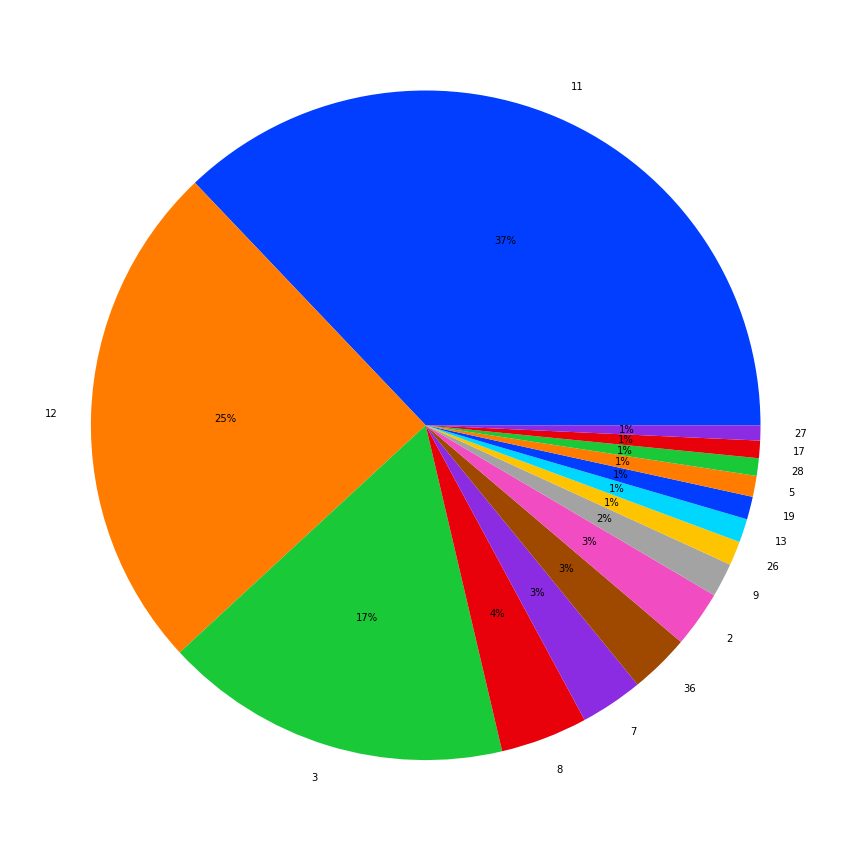

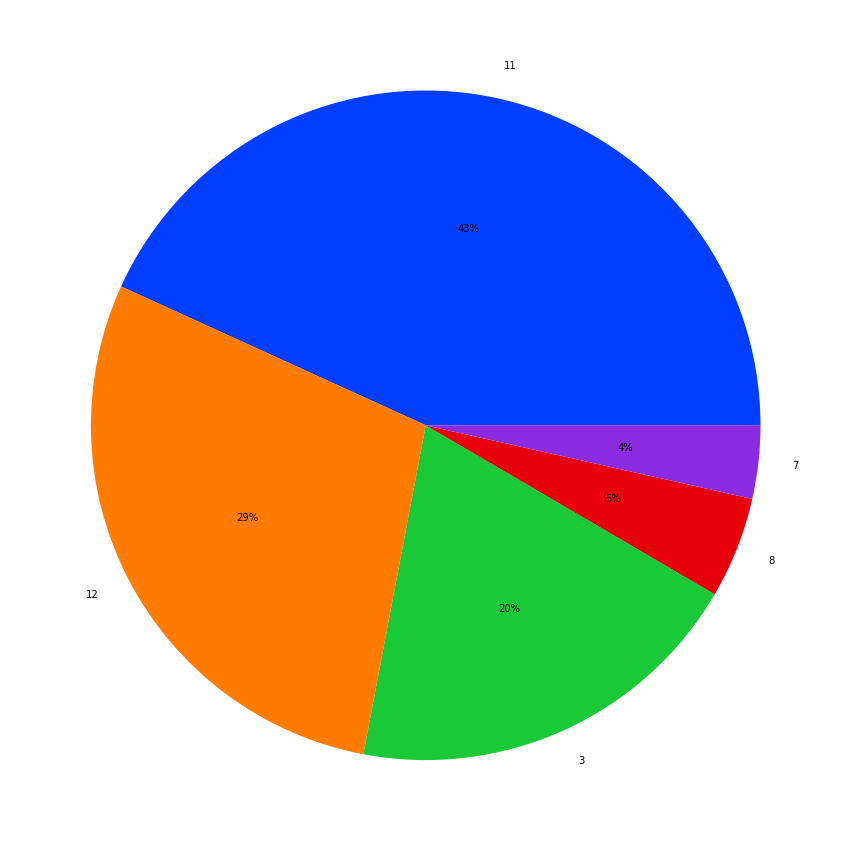

In [7]:
distribution = {k: v for k, v in sorted(distribution.items(), key=lambda item: item[1] , reverse= True)[:15]}
fig = plt.figure(figsize = (15,20))
x = list(distribution.keys())
y = list(distribution.values())
# declaring data
# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(y, labels=x, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

fig = plt.figure(figsize = (15,20))
x = list(distribution.keys())[:N_max]
y = list(distribution.values())[:N_max]
# declaring data
# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(y, labels=x, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [8]:
filter_label = x[:N_max]
def counter():
    global i
    i+=1
    return i
i = -1
reduced_labels = {k : counter() for k in filter_label }
cs_data["terms"] = cs_data["terms"].apply(lambda x : [reduced_labels[i] for i in x if i in filter_label])
cs_data = cs_data[cs_data["terms"].apply(lambda x : N_max >= len(x) >= N_min )] # filter with atleast 2 class
print(len(cs_data))
open("./DATA/Module_data/reduced_class_mapping.json","w").write(json.dumps(reduced_labels))
data_matrix = np.array([(row["abstracts"],row["titles"]) for idx,row in cs_data.iterrows()])
label_matrix = np.array([row["terms"] for idx,row in cs_data.iterrows()])

cs_data.to_csv("./DATA/Module_data/cs.csv")

C:\Users\AmirM\AppData\Local\Temp/ipykernel_2836/2712186772.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_data["terms"] = cs_data["terms"].apply(lambda x : [reduced_labels[i] for i in x if i in filter_label])


12728


C:\Users\AmirM\AppData\Local\Temp/ipykernel_2836/2712186772.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  label_matrix = np.array([row["terms"] for idx,row in cs_data.iterrows()])


In [9]:
cs_data

,terms,titles,abstracts
1,"[0, 2]",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
9,"[0, 2]",Variational Graph Normalized Auto-Encoders,Link prediction is one of the key problems for...
11,"[0, 2]",FedGraphNN: A Federated Learning System and Be...,Graph Neural Network (GNN) research is rapidly...
15,"[0, 2]",Sparsifying the Update Step in Graph Neural Ne...,"Message-Passing Neural Networks (MPNNs), the m..."
16,"[0, 2]",Computing Graph Descriptors on Edge Streams,Graph feature extraction is a fundamental task...
...,...,...,...
56144,"[0, 2]",Source Traces for Temporal Difference Learning,This paper motivates and develops source trace...
56145,"[0, 2]",Provably Efficient Maximum Entropy Exploration,Suppose an agent is in a (possibly unknown) Ma...
56147,"[0, 2]",NIPS - Not Even Wrong? A Systematic Review of ...,Objective: To determine the completeness of ar...
56168,"[0, 4]",It was the training data pruning too!,We study the current best model (KDG) for ques...
